# Biased Memory Toolbox (example)

First import all relevant libraries.

In [0]:
import biased_memory_toolbox as bmt
from datamatrix import io, operations as ops, DataMatrix
import numpy as np
from matplotlib import pyplot as plt

Read in a data file as a DataMatrix. There should be a column that contains
the memoranda (here: `hue1`) and a column that contains the responses (here:
`hue_response`), both in degrees with values between 0 and 360.

Next, we use the `response_bias()` function from `biased_memory_toolbox`
(imported as `bmt`) to calculate the `response bias`, which is the response
error in the direction of the category prototype. We use the default categories
as defined in the toolbox.

In [0]:
dm = io.readtxt('data_category.csv')
dm.response_bias = bmt.response_bias(
    dm.hue1,
    dm.hue_response,
    bmt.DEFAULT_CATEGORIES
)

Next, we loop through all participants, and for each participant separately
fit a mixture model to `response_bias`, resulting in a precision, guess rate,
and bias. This is done with `bmt.fit_mixture_model()`.

We also check whether participants responded above chance. This is done by
`bmt.test_chance_performance()`.

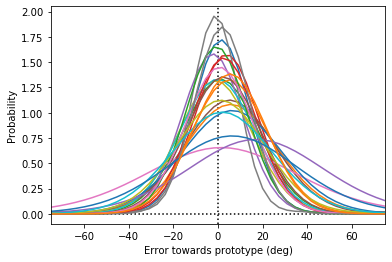

In [1]:
# Initialize an empty DataMatrix that will contain the fit results for each
# participant.
sm = DataMatrix(dm.sessionid.count)
sm.precision = -1
sm.guess_rate = -1
sm.bias = -1
sm.sessionid = -1
sm.p_chance = -1
# Intialize a plot that will contain the fits for individual participants.
plt.xlim(-75, 75)
plt.xlabel('Error towards prototype (deg)')
plt.ylabel('Probability')
plt.axvline(0, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
# Split the DataMatrix (dm) based on session id, such that we can loop through
# the for each participant separately.
for row, (sessionid, sdm) in zip(sm, ops.split(dm.sessionid)):
    row.sessionid = sessionid
    # Fit the mixture model and assign the parameters to the row of `sm`.
    row.precision, row.guess_rate, row.bias = \
        bmt.fit_mixture_model(sdm.response_bias)
    # Test chance performance. The first return value is the t value, which we
    # don't use. The second return value is the p value, which we assign to
    # the row of `sm`.
    _, row.p_chance = bmt.test_chance_performance(
        sdm.hue1,
        sdm.hue_response    
    )
    x = np.linspace(-180, 180, 100)
    y = bmt.mixture_model_pdf(x, row.precision, row.guess_rate, row.bias)
    plt.plot(x, y)
io.writetxt(sm, 'mixture-model-results.csv')

Show the results!

In [2]:
sm

DataMatrix[36, 0x7fc41f496730]
+----+---------------------+----------------------+------------------------+--------------------+--------------+
| #  |         bias        |      guess_rate      |        p_chance        |     precision      |  sessionid   |
+----+---------------------+----------------------+------------------------+--------------------+--------------+
| 0  |  1.4217392979155254 | 0.052181652199398444 | 7.712989825379358e-33  |    1.189784E+03    | 1.585730E+12 |
| 1  |  5.667487731518942  |          0           | 6.682329322041846e-25  | 436.87060009180897 | 1.585737E+12 |
| 2  |  1.1722770078213238 |          0           | 4.037222269463366e-31  | 653.0757954350673  | 1.585743E+12 |
| 3  |  3.7706330429912907 | 0.009072369172030186 | 4.1077279016054385e-31 | 923.5872042348702  | 1.585914E+12 |
| 4  |  -2.391284358866572 | 0.038175225972556556 | 4.902083750802149e-30  | 981.2399238539302  | 1.586164E+12 |
| 5  |   5.18644033164451  |          0           |  2.0304760910